<a href="https://colab.research.google.com/github/joshIsac/sem-2-lab-/blob/main/2348523_lab_5_Lasso_and_Ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
data=pd.read_csv('/content/drive/MyDrive/program_5_dataset.csv')
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [209]:
data.isnull().sum()


Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [210]:
data=data.dropna()

In [211]:
data.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [212]:
df=pd.DataFrame(data)
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [213]:
df.shape

(580, 14)

In [214]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,296.286207,47.434483,41.686379,68.315517,26.721379,33.421897,10.870172,8.214293,5.404086,81.877586,38.121034,71.934310
std,173.256239,9.947575,5.750408,25.975713,20.932912,32.346697,16.942965,2.177983,1.121399,51.038792,54.481827,5.305663
min,1.000000,23.000000,14.900000,11.300000,1.200000,10.600000,0.800000,1.420000,2.400000,8.000000,4.500000,44.800000
25%,147.750000,39.000000,38.975000,52.850000,16.475000,21.475000,5.200000,6.940000,4.627500,68.000000,15.550000,69.300000
50%,292.500000,47.000000,42.000000,66.300000,22.750000,25.650000,7.100000,8.265000,5.310000,77.000000,22.850000,72.100000
75%,445.250000,54.250000,45.200000,80.100000,32.025000,31.700000,11.000000,9.577500,6.100000,89.000000,37.650000,75.200000
max,613.000000,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


In [215]:
x=df['CREA'].values.reshape(-1, 1)
y=df['PROT'].values

In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42 )

simple linear regression implementation

In [217]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(x_train,y_train)

LinearRegression()

In [218]:
coef_mod=mod.coef_
intercept_mod=mod.intercept_

print(f'Coefficient: {coef_mod}')
print(f'Intercept: {intercept_mod}')

Coefficient: [-0.00362626]
Intercept: 72.21331496647235


evaluation of simple linear regression


In [275]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
y_pred_train=mod.predict(x_train)
mse_train=mean_squared_error(y_train,y_pred_train)
r2score_train=r2_score(x_train,y_pred_train)
print('mean squared error for train:',mse_train)
print('r squared for train:',r2score_train)


mean squared error for train: 29.034978348088927
r squared for train: -28.18630319605241


In [220]:
y_pred_test=mod.predict(x_test).reshape(-1,1)
mse_test=mean_squared_error(y_test,y_pred_test)
r2score_test=r2_score(x_test,y_pred_test)
print('mean squared error for test:',mse_test)
print('r squared for test:',r2score_test)


mean squared error for test: 24.98052149031294
r squared for test: -0.2640124217186177


In [221]:
x1=df[['ALB','ALP', 'ALT','AST','BIL','CHE','CHOL','CREA','GGT']]
y1=df['PROT']

In [222]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
print(vif_data)

  feature        VIF
0     ALB  31.162740
1     ALP  10.024253
2     ALT   3.184002
3     AST   2.938453
4     BIL   1.678633
5     CHE  22.397373
6    CHOL  27.238712
7    CREA   3.656226
8     GGT   2.542260


select the best attributes

In [223]:
s_pred=df[['BIL','GGT']]
y=df['PROT']

In [224]:
vif = pd.Series([variance_inflation_factor(s_pred.values,idx)
                 for idx in range(s_pred.shape[1])],
                index=s_pred.columns)
print(vif)


BIL    1.272752
GGT    1.272752
dtype: float64



BULDING MULTIPLE LINEAR REGRESSION


In [225]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(s_pred, y1, test_size=0.20, random_state=43 )

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
mul_lin=LinearRegression()
mul_lin.fit(x_train,y_train)

LinearRegression()

In [227]:
print(f"intercept: {mul_lin.intercept_}")
print(f"slope: {mul_lin.coef_}")

intercept: 71.98532301545018
slope: [ 0.01626306 -0.00660259]


In [228]:
y_test_pred = mul_lin.intercept_ + np.sum(mul_lin.coef_ * x_test, axis=1)
print(f"predicted response:\n{y_test_pred}")

predicted response:
606    71.359675
265    72.001836
240    72.020559
180    72.040380
233    71.402327
         ...    
531    71.938770
370    71.993015
273    71.950495
146    71.546688
365    71.873155
Length: 116, dtype: float64


In [229]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [230]:
mse_test

28.836509476361577

In [231]:
r2_test

-0.028701732528270574

In [232]:
y_train_pred=mul_lin.intercept_+np.sum(mul_lin.coef_ * x_train, axis=1)
y_train_pred

287    71.946645
338    71.864585
381    72.072524
373    71.937471
218    72.008896
         ...    
16     72.050896
59     72.045795
279    72.083671
257    72.075290
323    71.994197
Length: 464, dtype: float64

In [233]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


In [234]:
print(f'Training Mean Squared Error: {mse_train}, Training R-squared: {r2_train}')
print(f'Testing Mean Squared Error: {mse_test}, Testing R-squared: {r2_test}')



Training Mean Squared Error: 27.999048503073542, Training R-squared: 0.004187121218713785
Testing Mean Squared Error: 28.836509476361577, Testing R-squared: -0.028701732528270574


The output indicates that MSE for Train Set will deliver better model performance since it has a lower MSE value than testing Set.

R2 has a variance of 4% and -2.9% for the two sets, respectively, limiting the model's performance and variability and rendering the model poor.

Adjusted R2 shows similar characteristics. For a better model, we want higher R2 values.


In [235]:
x3=df[['ALB']].values.reshape(-1,1)


In [246]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x3, y, test_size=0.20, random_state=42 )

building a polynomial regeression

In [255]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=2,include_bias=True)
X_train_p=pol.fit_transform(x_train)
X_test_p=pol.fit_transform(x_test)


In [248]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_p,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.          1.92168267 -0.01650093]
21.053019242586814


polynomial regression with degree 2

In [289]:
from sklearn.metrics import r2_score
y_predict1=lin_reg.predict(X_test_p)
score=r2_score(y_test,y_predict1)
score

0.19588046698355777

In [290]:
mse1=sum((y_predict1-y_test)**2)/116
mse1

20.082153884716128

Implementing Polynomial Regression and calculating the coefficients (degree 3)

In [252]:
pol=PolynomialFeatures(degree=3,include_bias=True)
X_train_p=pol.fit_transform(x_train)
X_test_p=pol.fit_transform(x_test)


In [253]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_p,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.          1.92168267 -0.01650093]
21.053019242586814


Evaluating Polynomial Regression Model with degree 3



In [293]:
from sklearn.metrics import r2_score
y_predict2=lin_reg.predict(X_test_p)
score=r2_score(y_test,y_predict2)
score

0.19588046698355777

In [295]:
mse2=sum((y_predict2-y_test)**2)/116
mse2

20.082153884716128

Implementing Polynomial Regression and calculating the coefficients (degree 4)



In [257]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=4,include_bias=True)
X_train_p=pol.fit_transform(x_train)
X_test_p=pol.fit_transform(x_test)


In [261]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_p,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.00000000e+00  4.16092720e+00 -9.85042521e-02  1.24608445e-03
 -6.60269861e-06]
-0.208760367715783


evaluation of polynomial model of degree 4

In [298]:
from sklearn.metrics import r2_score
y_predict3=lin_reg.predict(X_test_p)
score=r2_score(y_test,y_predict3)
score

0.19588046698355777

In [299]:
mse3=sum((y_predict3-y_test)**2)/116
mse3

20.082153884716128

Implementing Ridge Regression and calculating best parameters and score

In [269]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [271]:
ridge=Ridge()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 150}
-20.105996309644524


Evaluating Ridge Regression Model

In [300]:
y_predict4=ridge_regressor.predict(x_test)
score=r2_score(y_test,y_predict4)
score

0.19868321017897006

In [302]:
mse4=sum((y_predict4-y_test)**2)/116
mse4

20.012157922873893


Implementing Lasso Regression and calculating best parameters and score

In [277]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 1}
-20.110696918144793


In [304]:
y_predict=lasso_regressor.predict(x_test)
score=r2_score(y_test,y_predict)
score

0.20714746485266644

In [305]:
mse4=sum((y_predict-y_test)**2)/116
mse4

19.80077086175009

Comparative Analysis Visualization of models based on MSE values

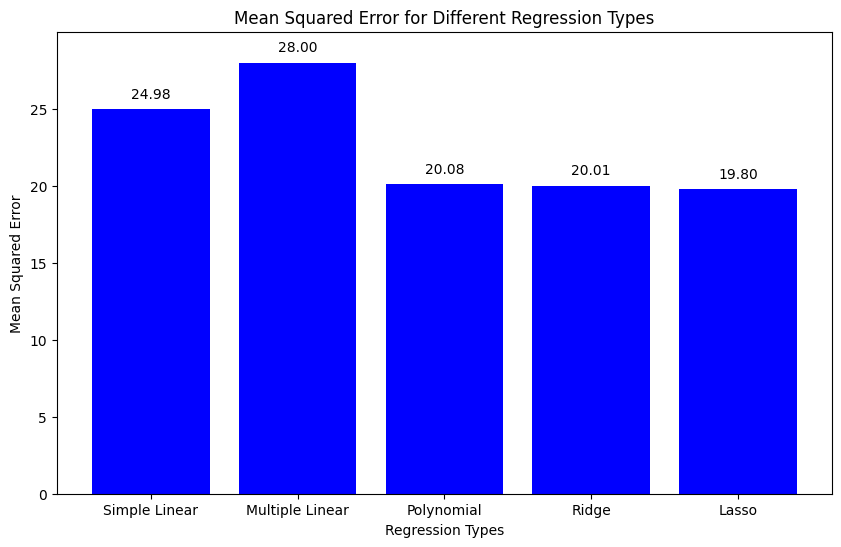

In [306]:
reg_types = ["Simple Linear", "Multiple Linear", "Polynomial", "Ridge", "Lasso"]
mse_values = [24.98052149031294,  27.999048503073542, 20.08, 20.0128, 19.80]
plt.figure(figsize=(10, 6))
plt.bar(reg_types, mse_values, color='blue')
plt.title('Mean Squared Error for Different Regression Types')
plt.xlabel('Regression Types')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_values) + 2)
for i, value in enumerate(mse_values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom')
plt.show()

in this scenario we can can give an inference that the model give normal results in simple and multiple whereas if we see the polynomial regression the MSE values decreases and upon lasso and ridge i.e l1 and l2 regularisation we say that the model does the best fit